In [1]:
# Third-party library imports~
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Regression

In [2]:
def check_regression_balance(df, target_column=None, bins=10):
    # Assuming the last column is the target variable if not specified
    if target_column is None:
        target_column = df.columns[-1]
    
    # Create bins for the target variable
    df['bin'] = pd.cut(df[target_column], bins=bins)
    
    # Count samples in each bin
    bin_counts = df['bin'].value_counts().sort_index()
    
    # Calculate the balance ratio
    balance_ratio = bin_counts.min() / bin_counts.max()
    
    print(f"Balance ratio: {balance_ratio:.2f}")
    if balance_ratio > 0.9:
        print("The dataset is well-balanced.")
    elif balance_ratio > 0.7:
        print("The dataset is moderately balanced.")
    else:
        print("The dataset is imbalanced.")
    
    # Visualize the distribution
    plt.figure(figsize=(10, 6))
    bin_counts.plot(kind='bar')
    plt.title(f"Distribution of {target_column} (binned)")
    plt.xlabel("Bins")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [3]:
# Create variable to store dataset name
dataset_name = 'boston'

In [4]:
df = pd.read_csv(f"../Datasets_benchmark/Regression/{dataset_name}.csv")

Balance ratio: 0.05
The dataset is imbalanced.


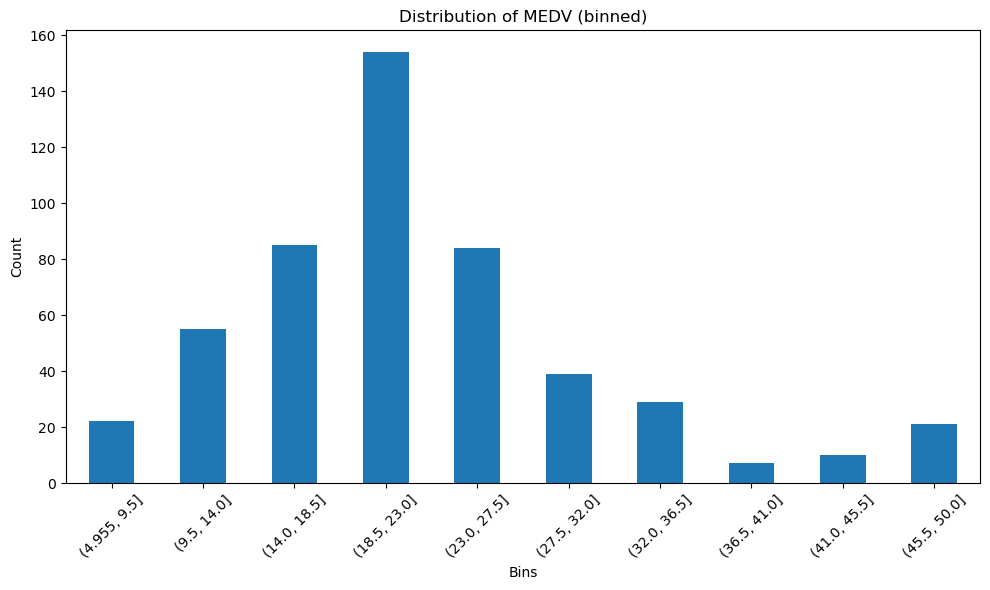

In [5]:
check_regression_balance(df)

Balance ratio: 0.12
The dataset is imbalanced.


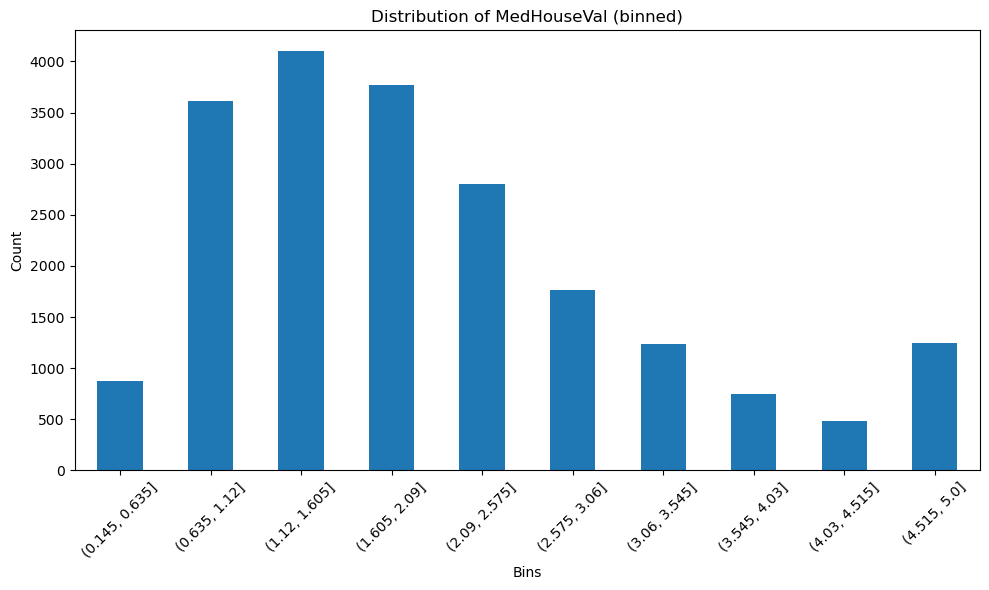

In [6]:
# Create variable to store dataset name
dataset_name = 'california_housing'
df = pd.read_csv(f"../Datasets_benchmark/Regression/{dataset_name}.csv")
check_regression_balance(df)

Balance ratio: 0.36
The dataset is imbalanced.


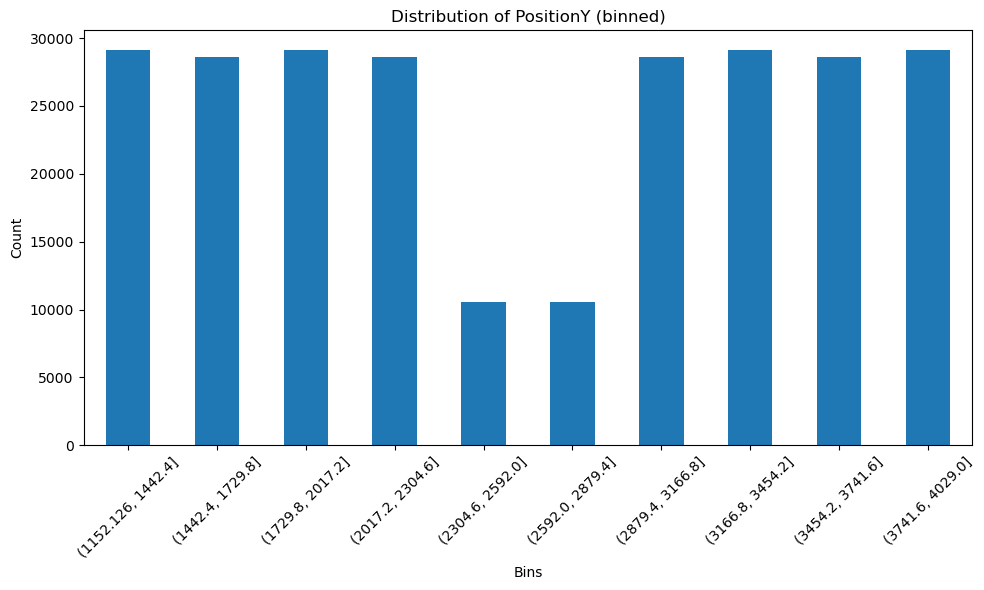

In [7]:
# Create variable to store dataset name
dataset_name = 'DIS_lab_LoS_8'
df = pd.read_csv(f"../Datasets_benchmark/Regression/{dataset_name}.csv")
check_regression_balance(df)

# Binary

In [8]:
def check_binary_balance(df, target_column=None):
    # Assuming the last column is the target variable if not specified
    if target_column is None:
        target_column = df.columns[-1]
    
    # Count the occurrences of each class
    class_counts = df[target_column].value_counts()
    
    # Calculate the balance ratio
    total_samples = len(df)
    balance_ratio = class_counts.min() / class_counts.max()
    
    print(f"Class distribution:")
    for class_label, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")
    
    print(f"\nBalance ratio: {balance_ratio:.2f}")
    if balance_ratio > 0.9:
        print("The dataset is well-balanced.")
    elif balance_ratio > 0.7:
        print("The dataset is moderately balanced.")
    else:
        print("The dataset is imbalanced.")
    
    # Visualize the class distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, data=df)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

Class distribution:
Class CHIKUNGUNYA: 5724 samples (50.00%)
Class DENGUE: 5724 samples (50.00%)

Balance ratio: 1.00
The dataset is well-balanced.


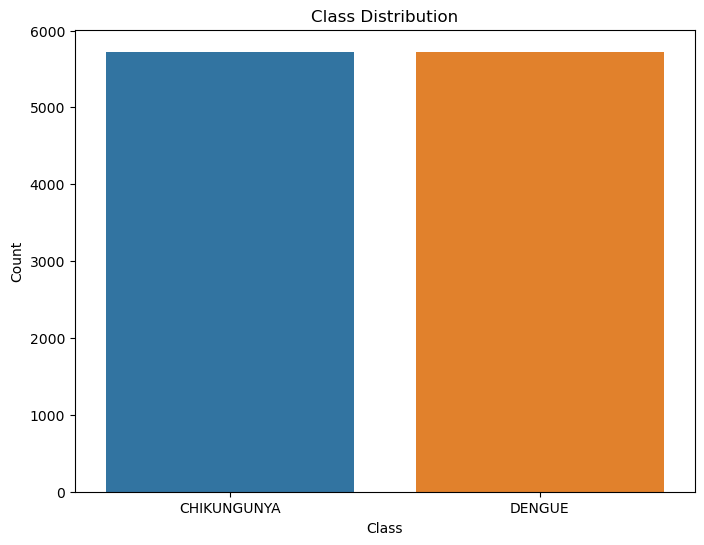

In [9]:
# Create variable to store dataset name
dataset_name = 'dengue_chikunguya_bin'
df = pd.read_csv(f"../Datasets_benchmark/Binary/{dataset_name}.csv")
check_binary_balance(df)

Class distribution:
Class Bad: 5136 samples (52.03%)
Class Good: 4735 samples (47.97%)

Balance ratio: 0.92
The dataset is well-balanced.


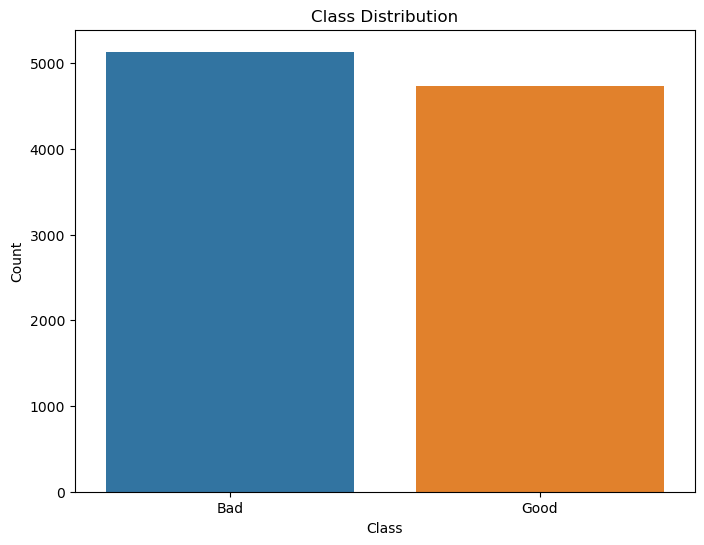

In [10]:
# Create variable to store dataset name
dataset_name = 'preprocessed_heloc'
df = pd.read_csv(f"../Datasets_benchmark/Binary/{dataset_name}.csv")
check_binary_balance(df)

# Multiclass

In [11]:

def check_multiclass_balance(df, target_column=None):
    # Assuming the last column is the target variable if not specified
    if target_column is None:
        target_column = df.columns[-1]
    
    # Count the occurrences of each class
    class_counts = df[target_column].value_counts()
    
    # Calculate statistics
    total_samples = len(df)
    num_classes = len(class_counts)
    balance_ratio = class_counts.min() / class_counts.max()
    
    print(f"Number of classes: {num_classes}")
    print(f"\nClass distribution:")
    for class_label, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")
    
    print(f"\nBalance ratio (min/max): {balance_ratio:.2f}")
    
    # Calculate entropy of class distribution
    class_probs = class_counts / total_samples
    entropy = -np.sum(class_probs * np.log2(class_probs))
    max_entropy = np.log2(num_classes)
    normalized_entropy = entropy / max_entropy
    
    print(f"Normalized entropy: {normalized_entropy:.2f}")
    
    if balance_ratio > 0.9 and normalized_entropy > 0.9:
        print("The dataset is well-balanced.")
    elif balance_ratio > 0.7 and normalized_entropy > 0.7:
        print("The dataset is moderately balanced.")
    else:
        print("The dataset is imbalanced.")
    
    # Visualize the class distribution
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    
    plt.subplot(122)
    class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title("Class Distribution (%)")
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

Number of classes: 7

Class distribution:
Class 2: 283301 samples (48.76%)
Class 1: 211840 samples (36.46%)
Class 3: 35754 samples (6.15%)
Class 7: 20510 samples (3.53%)
Class 6: 17367 samples (2.99%)
Class 5: 9493 samples (1.63%)
Class 4: 2747 samples (0.47%)

Balance ratio (min/max): 0.01
Normalized entropy: 0.62
The dataset is imbalanced.


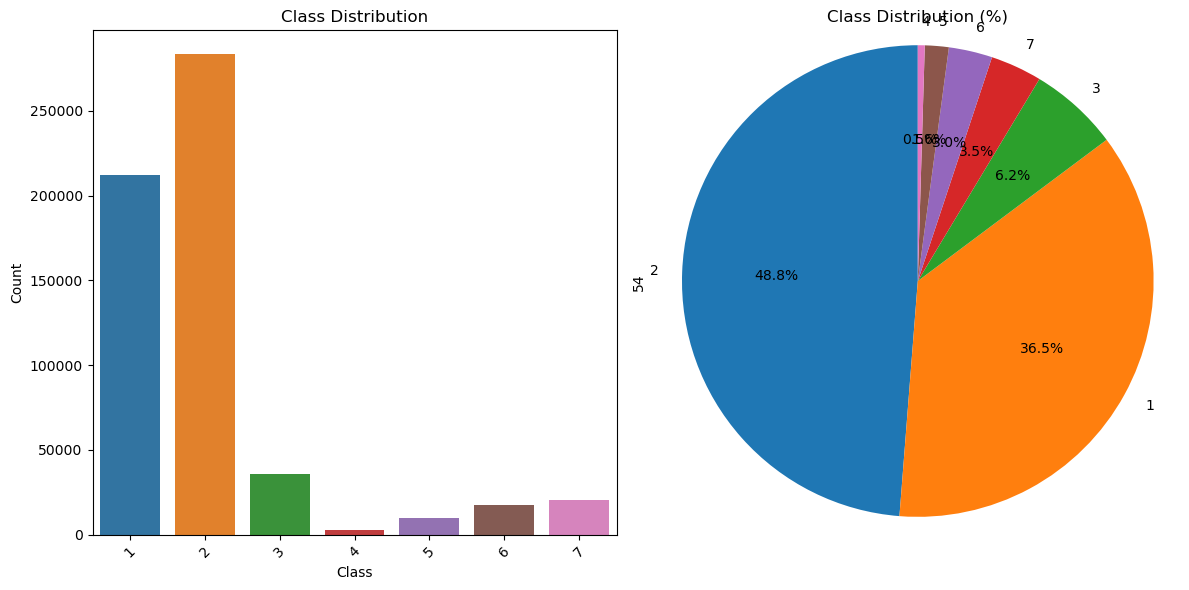

In [12]:
# Usage
dataset_name = "covtype"
df = pd.read_csv(f"../Datasets_benchmark/Multiclass/{dataset_name}.csv")
check_multiclass_balance(df)

Number of classes: 6

Class distribution:
Class 5: 3009 samples (21.63%)
Class 2: 2926 samples (21.04%)
Class 1: 2565 samples (18.44%)
Class 4: 1936 samples (13.92%)
Class 6: 1833 samples (13.18%)
Class 3: 1641 samples (11.80%)

Balance ratio (min/max): 0.55
Normalized entropy: 0.98
The dataset is imbalanced.


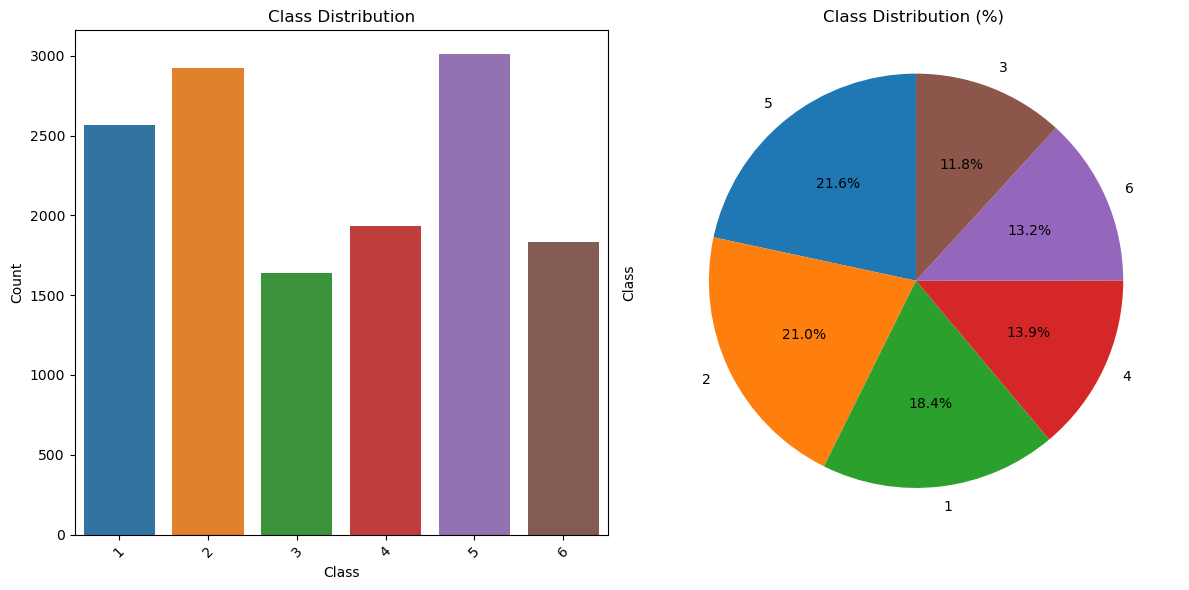

In [13]:
# Usage
dataset_name = "gas"
df = pd.read_csv(f"../Datasets_benchmark/Multiclass/{dataset_name}.csv")
check_multiclass_balance(df)